#Projections for the 2014 season week #16

This is the software user story if the setting is the year 2014 and the upcoming NFL Fantasy Football week is #16. The user is looking for a lineup based on players where most fantasy points is scored. 

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pylab

# this allows plots to appear directly in the notebook
%matplotlib inline
# increase size of plots
pylab.rcParams['figure.figsize'] = (15, 10)

In [5]:
# read files from spead sheets into data frames

wk1 = pd.read_csv("../data/fanduel_data/fanduel2014week1.csv",delimiter=";")
wk2 = pd.read_csv("../data/fanduel_data/fanduel2014week2.csv",delimiter=";")
wk3 = pd.read_csv("../data/fanduel_data/fanduel2014week3.csv",delimiter=";")
wk4 = pd.read_csv("../data/fanduel_data/fanduel2014week4.csv",delimiter=";")
wk5 = pd.read_csv("../data/fanduel_data/fanduel2014week5.csv",delimiter=";")
wk6 = pd.read_csv("../data/fanduel_data/fanduel2014week6.csv",delimiter=";")
wk7 = pd.read_csv("../data/fanduel_data/fanduel2014week7.csv",delimiter=";")
wk8 = pd.read_csv("../data/fanduel_data/fanduel2014week8.csv",delimiter=";")
wk9 = pd.read_csv("../data/fanduel_data/fanduel2014week9.csv",delimiter=";")
wk10 = pd.read_csv("../data/fanduel_data/fanduel2014week10.csv",delimiter=";")
wk11 = pd.read_csv("../data/fanduel_data/fanduel2014week11.csv",delimiter=";")
wk12 = pd.read_csv("../data/fanduel_data/fanduel2014week12.csv",delimiter=";")
wk13 = pd.read_csv("../data/fanduel_data/fanduel2014week13.csv",delimiter=";")
wk14 = pd.read_csv("../data/fanduel_data/fanduel2014week14.csv",delimiter=";")
wk15 = pd.read_csv("../data/fanduel_data/fanduel2014week15.csv",delimiter=";")
wk16 = pd.read_csv("../data/fanduel_data/fanduel2014week16.csv",delimiter=";")
wk17 = pd.read_csv("../data/fanduel_data/fanduel2014week17.csv",delimiter=";")

# create data frame consisting of first 15 weeks
fanDuel2014Stats = wk1.append(wk2).append(wk3).append(wk4).append(wk5).append(wk6).append(wk7).append(wk8).append(wk9).append(wk10).append(wk11).append(wk12).append(wk13).append(wk14).append(wk15)
# rename columns
fanDuel2014Stats['homeaway'] = fanDuel2014Stats['h/a']
fanDuel2014Stats['FDpoints'] = fanDuel2014Stats['FD points']
fanDuel2014Stats['FDsalary'] = fanDuel2014Stats['FD salary']
fanDuel2014Stats = fanDuel2014Stats.drop('h/a',1)
fanDuel2014Stats = fanDuel2014Stats.drop('FD points',1)
fanDuel2014Stats = fanDuel2014Stats.drop('FD salary',1)
# take out unusable data
fanDuel2014Stats = fanDuel2014Stats[fanDuel2014Stats['FDsalary'] != 0]


#This is what all statistics look like for the 2014 season up to week 15

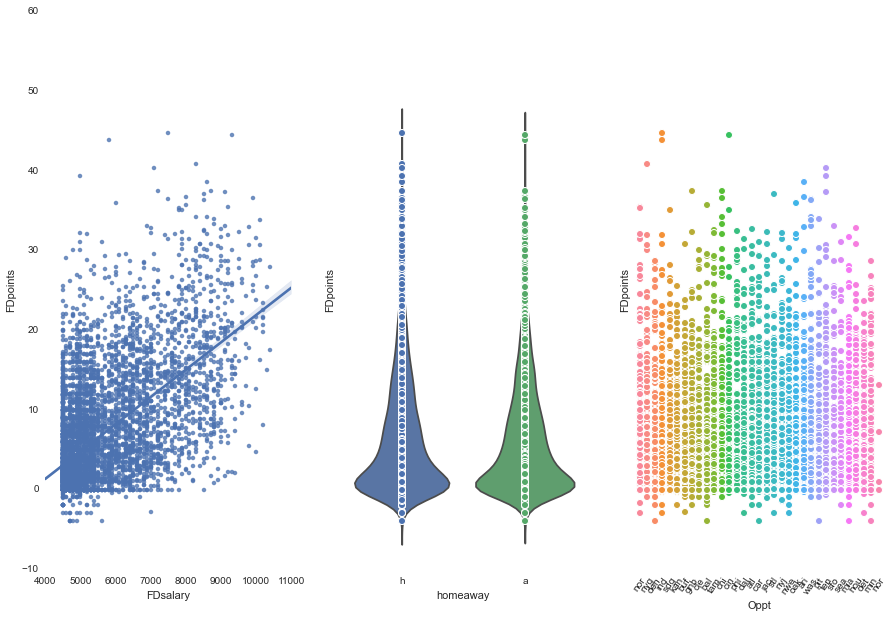

In [6]:
fig, axs = plt.subplots(1, 3, sharey=True)

sns.regplot(x='FDsalary',y='FDpoints',data=fanDuel2014Stats, ax=axs[0])
sns.stripplot(x='homeaway', y='FDpoints',data=fanDuel2014Stats,ax=axs[1])
sns.violinplot(x='homeaway', y='FDpoints',data=fanDuel2014Stats,ax=axs[1],inner=None)
sns.stripplot(x='Oppt', y='FDpoints',data=fanDuel2014Stats,ax=axs[2]).set_xticklabels(wk1['Oppt'],rotation=55)

##Start with selecting a quarterback in the lineup

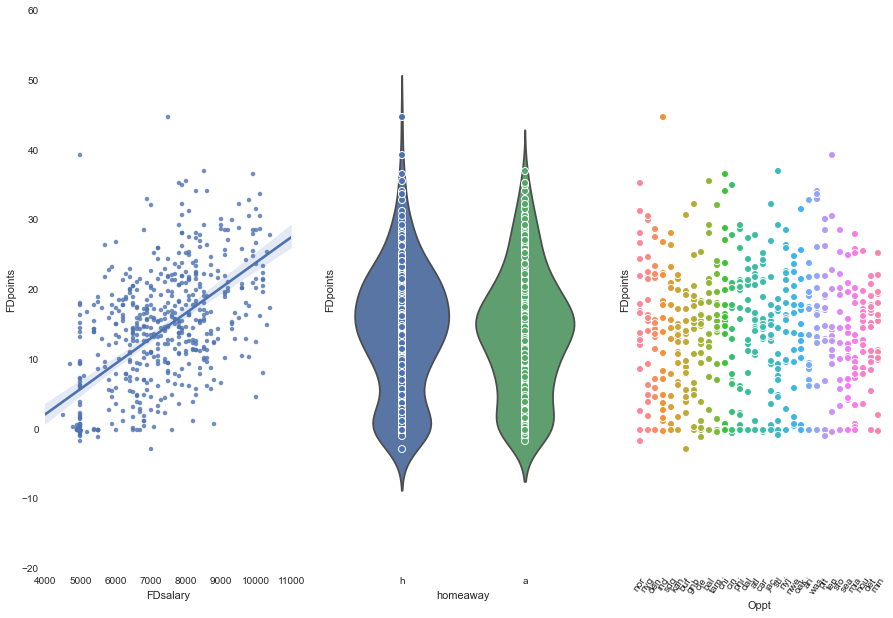

In [7]:
# QB data frame
quarterbacks = fanDuel2014Stats[fanDuel2014Stats['Pos'] == 'QB']
# sns.regplot(x='FDsalary',y='FDpoints',data=quarterbacks)

fig, axs = plt.subplots(1, 3, sharey=True)
#quarterbacks.plot(kind='scatter', x='FD salary', y='FD points', ax=axs[0])
#quarterbacks.plot(kind='scatter', x='homeaway', y='FD points', ax=axs[1])
#quarterbacks.plot(kind='scatter', x='homeaway', y='FD points', ax=axs[2])

sns.regplot(x='FDsalary',y='FDpoints',data=quarterbacks, ax=axs[0])
sns.stripplot(x='homeaway', y='FDpoints',data=quarterbacks,ax=axs[1])
sns.violinplot(x='homeaway', y='FDpoints',data=quarterbacks,ax=axs[1],inner=None)
sns.stripplot(x='Oppt', y='FDpoints',data=quarterbacks,ax=axs[2]).set_xticklabels(wk1['Oppt'],rotation=55)

#####The information here is still too broad to make projections. We need to be more specific in our parameters so that projections are more accurate.

## Need to calculate average points for each player scored up to week 15.
Using Cam Newton of the Panthers as an example, here are the visualizations of statistics for weeks 1 to 15. 

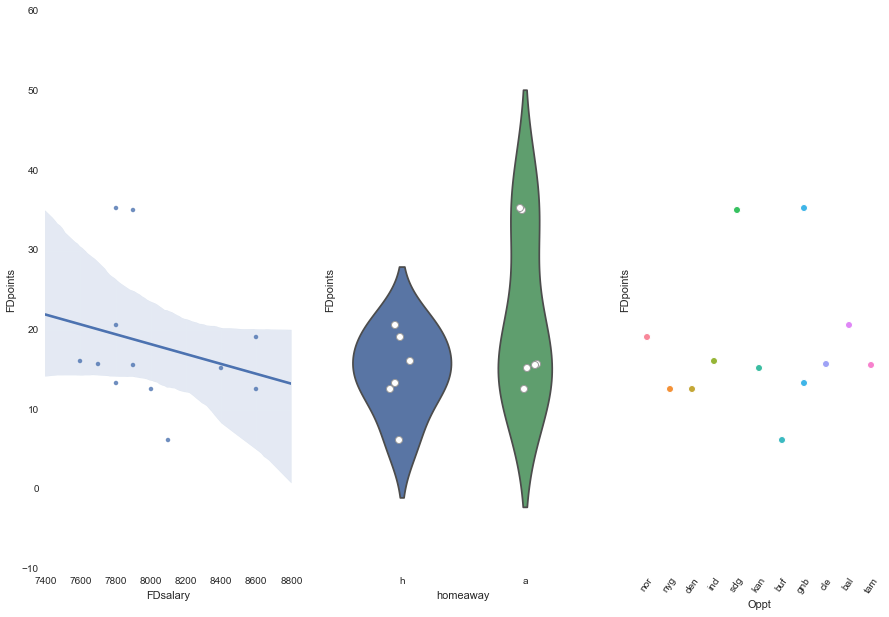

In [8]:
camNewton = fanDuel2014Stats[fanDuel2014Stats['Name']=='Newton, Cam']
# russellWilson.describe()

fig, axs = plt.subplots(1, 3, sharey=True)

sns.regplot(x='FDsalary',y='FDpoints',data=camNewton, ax=axs[0])
sns.stripplot(x='homeaway', y='FDpoints',data=camNewton,ax=axs[1],color='white',edgecolor='gray',jitter=True)
sns.violinplot(x='homeaway', y='FDpoints',data=camNewton,ax=axs[1],inner=None)
sns.stripplot(x='Oppt', y='FDpoints',data=camNewton,ax=axs[2]).set_xticklabels(wk1['Oppt'],rotation=55)

###Now this is useful information!

Graph 1 are the points scored based on his given salary of the week with a linear regression line and plotted points.
Graph 2 shows us a plot of the points scored based on whether he was home or away.
Graph 3 tells us how many points he's scored against other teams.


Let's use these models to predict his FD points for week 16. It's important to note that Cam Newton's "Salary" for week 16 is $8,100 and the game is a home game against the Cleveland Browns.

In [36]:
camNewtonRegLine = smf.ols(formula='FDpoints ~ FDsalary',data=camNewton).fit()

# used for the lin reg line equation
camNewtonRegLine.params

Intercept    67.903916
FDsalary     -0.006204
dtype: float64

Above gives us the linear regression equation which we can use to estimate his upcoming game. The prediction model is represented by the equation :
#####y = mx + b

In [58]:
# y = Fantasy Points Scored
# m = -.006204 = rate of which points is changing
# x = 8100 = FDsalary
# b = 67.903916 = y intercept

camNewtonPtsBySalary = ((-.006204)*(8100)+(67.903916))
print (camNewtonPtsBySalary)

17.651515999999994


##FDpoints scored based on Salary = 17.65 using linear regression

In [59]:
camNewton.FDpoints.mean()

18.164999999999999

##FDpoints scored based on mean throuout the season = 18.1649

In [60]:
camNewton[camNewton['homeaway']=='h'].FDpoints.mean()

14.699999999999998

##Mean points for Cam Newton at home = 19.69

In [62]:
ptsAgainstCle = fanDuel2014Stats[fanDuel2014Stats['Oppt']=='cle']
ptsAgainstCle = ptsAgainstCle[ptsAgainstCle['Pos']=='QB']
ptsAgainstCle = ptsAgainstCle[ptsAgainstCle['homeaway']=='h']
ptsAgainstCle.mean()

Week           7.875
Year        2014.000
GID         1315.250
FDpoints      11.165
FDsalary    6900.000
dtype: float64

##Mean points for a 'QB' at 'home' scored against the 'Cleveland Browns' = 21.165 points

#Summarizing Cam Newton's projected points:

#####Points projected to score on week 16 based on Cam Newton's:
####17.65 = linear regression equation
####18.17 = overall mean up to week 15
####19.69 = mean at home
#####Points projected to score on week 16 for a 'QB' at 'Home' with 'Opponent' Cleveland Browns:
####21.17

In [77]:
# Calculate average
print((17.65+18.7+19.69+21.17)/4)

19.3025


#Cam Newton's projected points for week 16 = 19.30

#Cam Newton's actual points for week 16 = 20.16
That's a difference of .86!

##Cam Newton's 2013 average points scored throughout the season

In [71]:
# read files from spead sheets into data frames

yr13wk1 = pd.read_csv("../data/fanduel_data/fanduel2013week1.csv",delimiter=";")
yr13wk2 = pd.read_csv("../data/fanduel_data/fanduel2013week2.csv",delimiter=";")
yr13wk3 = pd.read_csv("../data/fanduel_data/fanduel2013week3.csv",delimiter=";")
yr13wk4 = pd.read_csv("../data/fanduel_data/fanduel2013week4.csv",delimiter=";")
yr13wk5 = pd.read_csv("../data/fanduel_data/fanduel2013week5.csv",delimiter=";")
yr13wk6 = pd.read_csv("../data/fanduel_data/fanduel2013week6.csv",delimiter=";")
yr13wk7 = pd.read_csv("../data/fanduel_data/fanduel2013week7.csv",delimiter=";")
yr13wk8 = pd.read_csv("../data/fanduel_data/fanduel2013week8.csv",delimiter=";")
yr13wk9 = pd.read_csv("../data/fanduel_data/fanduel2013week9.csv",delimiter=";")
yr13wk10 = pd.read_csv("../data/fanduel_data/fanduel2013week10.csv",delimiter=";")
yr13wk11 = pd.read_csv("../data/fanduel_data/fanduel2013week11.csv",delimiter=";")
yr13wk12 = pd.read_csv("../data/fanduel_data/fanduel2013week12.csv",delimiter=";")
yr13wk13 = pd.read_csv("../data/fanduel_data/fanduel2013week13.csv",delimiter=";")
yr13wk14 = pd.read_csv("../data/fanduel_data/fanduel2013week14.csv",delimiter=";")
yr13wk15 = pd.read_csv("../data/fanduel_data/fanduel2013week15.csv",delimiter=";")
yr13wk16 = pd.read_csv("../data/fanduel_data/fanduel2013week16.csv",delimiter=";")
yr13wk17 = pd.read_csv("../data/fanduel_data/fanduel2013week17.csv",delimiter=";")

# create data frame consisting of first 15 weeks
fanDuel2013Stats = yr13wk1.append(yr13wk2).append(yr13wk3).append(yr13wk4).append(yr13wk5).append(yr13wk6).append(yr13wk7).append(yr13wk8).append(yr13wk9).append(yr13wk10).append(yr13wk11).append(yr13wk12).append(yr13wk13).append(yr13wk14).append(yr13wk15).append(yr13wk16).append(yr13wk17)
# rename columns
fanDuel2013Stats['homeaway'] = fanDuel2013Stats['h/a']
fanDuel2013Stats['FDpoints'] = fanDuel2013Stats['FD points']
fanDuel2013Stats['FDsalary'] = fanDuel2013Stats['FD salary']
fanDuel2013Stats = fanDuel2013Stats.drop('h/a',1)
fanDuel2013Stats = fanDuel2013Stats.drop('FD points',1)
fanDuel2013Stats = fanDuel2013Stats.drop('FD salary',1)
# take out unusable data
fanDuel2013Stats = fanDuel2013Stats[fanDuel2013Stats['FDsalary'] != 0]
camNewton13 = fanDuel2013Stats[fanDuel2013Stats['Name']=='Newton, Cam']
camNewton13.FDpoints.mean()

19.428750000000001

In [3]:
# Calculate average
print((17.65+18.7+19.69+21.17+19.43)/5)
print(19.33/20.16*100)

19.327999999999996
95.8829365079365


#If included 2013 average, his projected points would become 19.33, slightly more accurate than previous projection of 19.30.

#Accuracy of Cam Newton week 16 accuracy = 95.88%